# Machine Learning - Linear Regression

## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Load Diabetes Dataset
age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

442 instances. 11 columns.
Target: quantitative measure of disease progression one year after baseline

In [ ]:
# Convert sklearn diabetes dataset to dataframe

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_diabetes = sklearn_to_df(datasets.load_diabetes())

## Exploratory Data Analysis

In [ ]:
# Dimensions of dataframe
df_diabetes.shape

# (rows, columns)

(442, 11)

In [ ]:
# Summary of dataframe structure and information
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
# Basic statistics
df_diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [ ]:
# Display first 5 rows
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


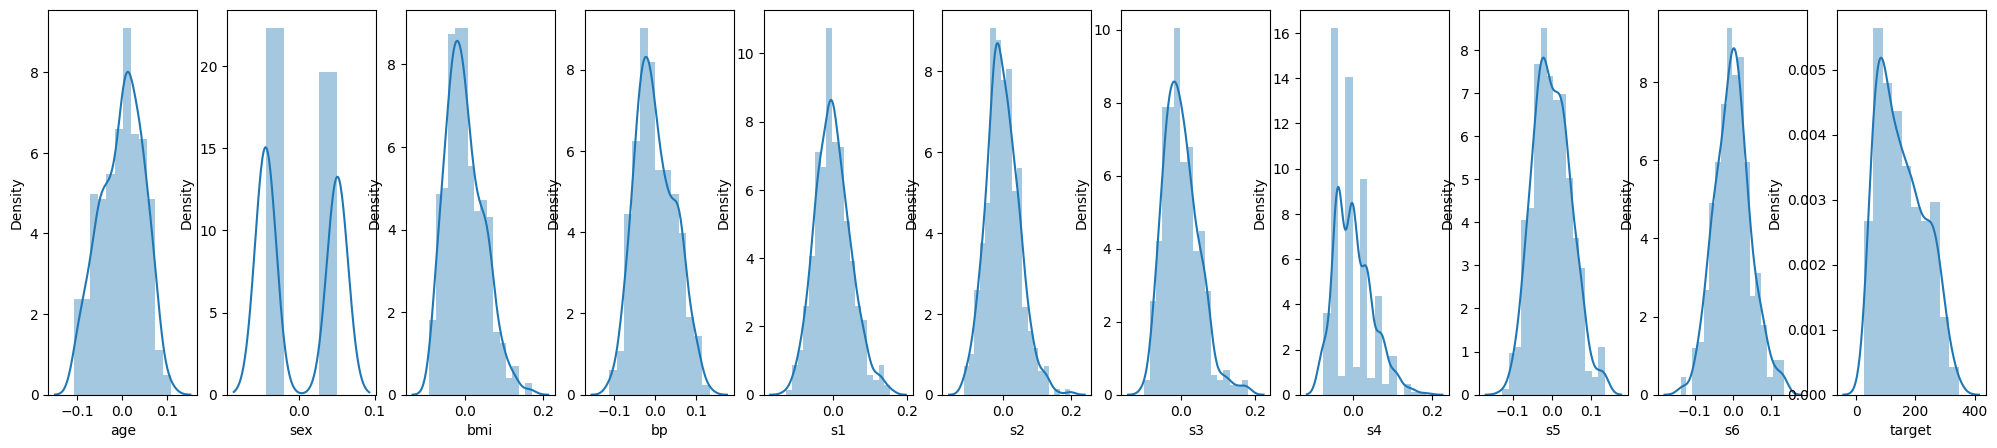

In [ ]:
# Assign column names to a variable
columns = df_diabetes.columns

# Distplot
#for i in columns:
#    plt.figure(figsize=(4,4))
#    (sns.distplot(df_diabetes[i]))

plt.figure(figsize=(25,5))
for indx, cols in enumerate(columns):
    plt.subplot(1,len(columns), indx+1)
    sns.distplot(df_diabetes[cols])




<Axes: >

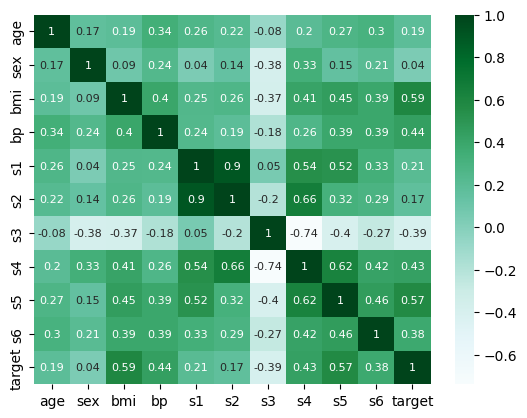

In [ ]:
# Correlation between features and outcome
sns.heatmap(round(df_diabetes.corr(numeric_only=True),2), annot=True, cmap="BuGn", annot_kws={'size': 8})

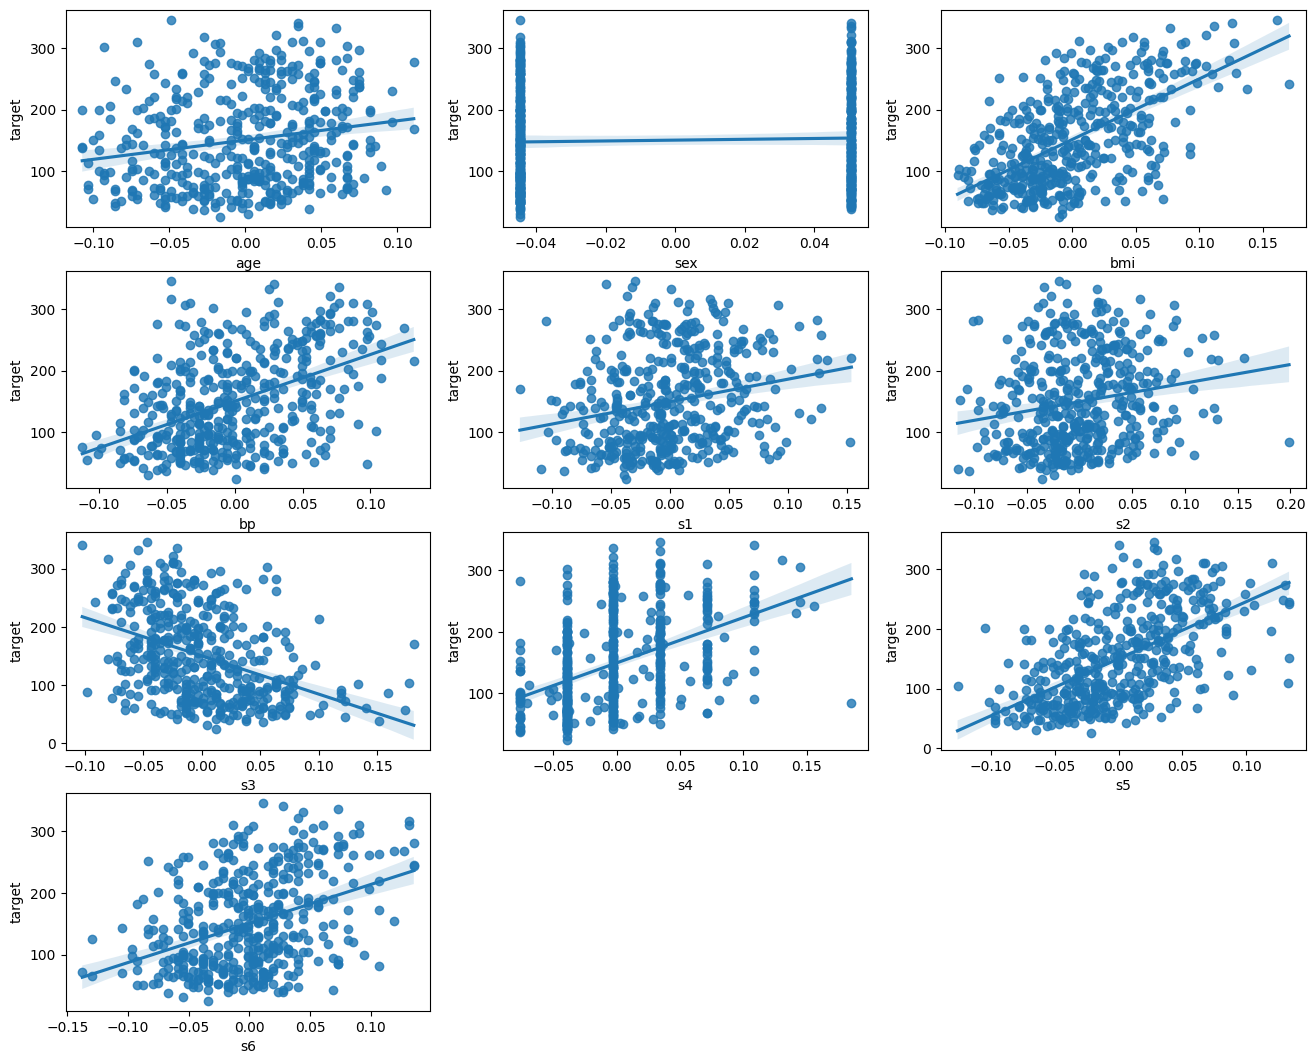

In [ ]:
# Regplot
plt.figure(figsize=(16,13))
cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


for i, feat in enumerate(cols):
    plt.subplot(4,3,i+1)
    sns.regplot(data=df_diabetes, x = df_diabetes[feat], y = 'target', robust=True)

plt.show()


<Axes: xlabel='variable', ylabel='value'>

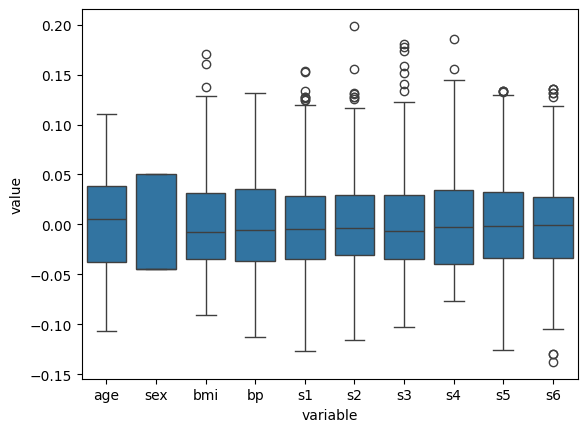

In [ ]:
# Boxplot
df_diabetes_g = df_diabetes[cols]
sns.boxplot(x="variable", y = "value", data=pd.melt(df_diabetes_g))

## Separate Features from Outcome

In [ ]:
# Define X.  Features
X = df_diabetes.drop('target', axis=1)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
# Define y. Outcome
y = df_diabetes['target']
y


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
# Dimensions of X and y.  Features and Outcome
print(X.shape, y.shape)


(442, 10) (442,)


## OLS Regression

### OLS Regression 1

In [ ]:
import statsmodels.api as sm

# STATSMODELS

# Add intercept
X = sm.add_constant(X)

# create model
lml = sm.OLS(y,X)

# fit model
results = lml.fit()

# print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        22:21:14   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

The above summary provides the following information.

<p><b>R-squared</b>:  the model only explains 51% of the data.</p>

<p>The <b>F-statistic probability</b> is less than 0.05 indicating the model is statistically significant and the selected features are useful for explaining the variation in the target.</p>

The <b>probability for the t-test</b> of four features (sex, bmi, bp, and s5) have a value less than 0.05 indicating the features have a relationship with the target.  



In [ ]:
# Calculate the Root Mean Squared Error for the last run of the OLS model

from statsmodels.tools.eval_measures import rmse
# Predict
ypred = results.predict(X)

# calc rmse
rmse = rmse(y, ypred)
print("OLS RMSE:  ", rmse)

OLS RMSE:   53.47612876402657


### OLS Regression 2

In [ ]:
# Run OLS again with the features that have a relationship with the target

# Select features that have a relationship with target
SX = df_diabetes[['sex', 'bmi', 'bp', 's5']]

# Add intercept
SX = sm.add_constant(SX)

# Create model
lml2 = sm.OLS(y,SX)

# Fit model
results2 = lml2.fit()

# Print regression results
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           5.42e-62
Time:                        22:21:57   Log-Likelihood:                -2399.8
No. Observations:                 442   AIC:                             4810.
Df Residuals:                     437   BIC:                             4830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.639     57.648      0.0

In [ ]:
# Calculate the Root Mean Squared Error for the last run of the OLS model

from statsmodels.tools.eval_measures import rmse
# Predict
ypred = results2.predict(SX)

# calc rmse
rmse = rmse(y, ypred)
print("OLS RMSE:  ", rmse)

OLS RMSE:   55.166891255875804


### OLS Regression 3

The above summary provides the following information.

<p><b>R-squared</b>:  the model only explains 49% of the data.</p>

<p>The <b>F-statistic</b> increased from 46.27 to 103.60. The F-statistic probability is less than 0.05 indicating the model is statistically significant and the selected features are useful for explaining the variation in the target.</p>

The <b>probability for the t-test</b> of four features (sex, bmi, bp, and s5) have a value less than 0.05 indicating the features have a relationship with the target. Three features have a probability of 0.

In [ ]:
# Run the model again.  This time drop feature: sex.

# Select features
SX = df_diabetes[['bmi', 'bp', 's5']]

# Add intercept
SX = sm.add_constant(SX)

# Create model
lml3 = sm.OLS(y,SX)

# Fit model
results3 = lml3.fit()

# Print regression results
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           7.16e-62
Time:                        22:23:19   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.653     57.342      0.0

The above summary provides the following information.

<p><b>R-squared</b>:  the model only explains 48% of the data.</p>

<p>The <b>F-statistic</b> increased from 103.60 to 134.8. The F-statistic probability is less than 0.05 indicating the model is statistically significant and the selected features are useful for explaining the variation in the target.</p>

The <b>probability for the t-test</b> of three features (bmi, bp, and s5) have a value less than 0.05 indicating the features have a relationship with the target.

In [ ]:
# Calculate the Root Mean Squared Error for the last run of the OLS model

from statsmodels.tools.eval_measures import rmse
# Predict
ypred = results3.predict(SX)

# calc rmse
rmse = rmse(y, ypred)
print("OLS RMSE:  ", rmse)

OLS RMSE:   55.52523159092378


Text(0.5, 1.0, 'Actual vs Predicted for OLS Model')

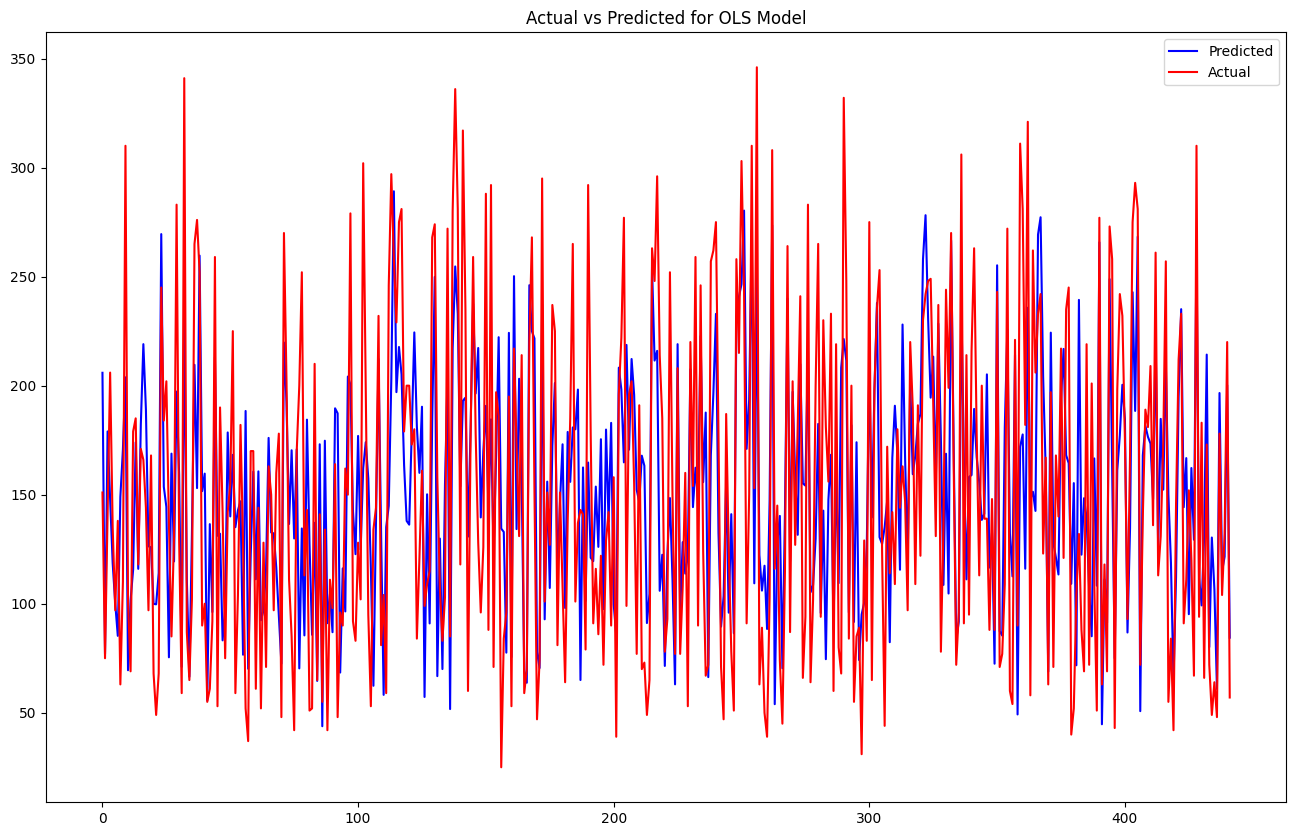

In [ ]:
# Plot Actual vs Predicted for OLS Model

plt.figure(figsize=(16, 10))
plt.plot(range(len(ypred)), ypred, color= "blue", label = "Predicted")
plt.plot(range(len(y)),y, color = "red", label = "Actual")
plt.legend(loc="upper right")
plt.title("Actual vs Predicted for OLS Model")

## Ridge () Linear Regression

### Hyperparameter Optimization for Regression using RandomSearch
<p>What are the best parameters for the Ridge  Regression model based on this data?</p>

In [ ]:
# Load libraries for Hyperparameter Optimization
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [ ]:
# Define model
model = Ridge(random_state = 1)

In [ ]:
# Define cross-validation object
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# Define hyperparameter search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]


In [ ]:
# Define hyperparameter search
search = RandomizedSearchCV(model,space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [ ]:
feature_cols = ['bmi', 'bp', 's5']
X = df_diabetes[feature_cols]
y = df_diabetes['target']
print(X.shape, y.shape)

(442, 3) (442,)


In [ ]:
# Execute hyperparameter search
Result = search.fit(X,y)

In [ ]:
# Summarize result. Print optimal parameters for the model with score
print('Best Score: %s'% Result.best_score_)
print('Best Hyperparameters: %s'% Result.best_params_)

Best Score: -46.320330017086306
Best Hyperparameters: {'alpha': 1.1549780125663173e-05, 'fit_intercept': True, 'solver': 'sag'}


### Ridge() Linear Regression - Split into Train and Test datasets

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 3)
(133, 3)
(309,)
(133,)


### Ridge() Linear Regression -  Define, Fit, Predict, Metrics

In [ ]:
# Define model using best hyperparameters
r_model = Ridge(alpha= 1.1549780125663173e-05, fit_intercept= True, solver= 'sag')

In [ ]:
# Fit model
r_model.fit(X_train,y_train)

Ridge(alpha=1.1549780125663173e-05, solver='sag')

In [ ]:
# Predict
y_pred = r_model.predict(X_test)

In [ ]:
# Print regression line intercept
print("Regression line intercept:  ", r_model.intercept_)

Regression line intercept:   150.7216500022098


In [ ]:
# pair coefficients with column names
print("Regression line coefficients:  ")
list(zip(feature_cols, r_model.coef_))

Regression line coefficients:  


[('bmi', 670.6039310683593),
 ('bp', 312.99842754860697),
 ('s5', 441.0526840947035)]

In [ ]:
comparison_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
comparison_df

,Actual,Predicted
287,219.0,155.856622
211,70.0,172.386360
72,202.0,181.340652
321,230.0,253.909026
73,111.0,134.198505
...,...,...
238,257.0,167.947537
26,137.0,71.839637
7,63.0,154.509137
401,93.0,83.824725


Text(0.5, 1.0, ' Actual vs Predicated for Ridge Model')

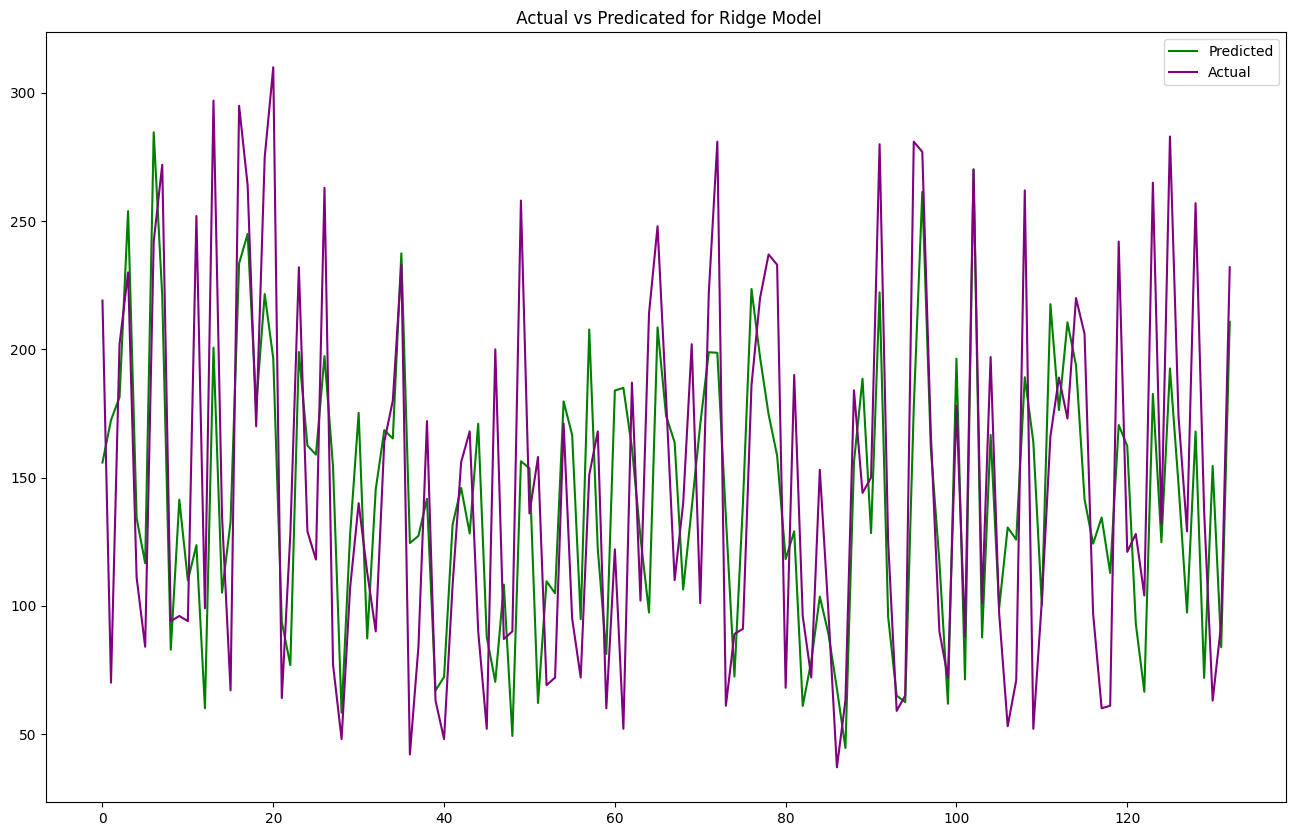

In [ ]:
# Plot Actual vs Predicted for Ridge Model
plt.figure(figsize=(16, 10))
plt.plot(range(len(y_pred)), y_pred, color= "green", label = "Predicted")
plt.plot(range(len(y_test)),y_test, color = "purple", label = "Actual")
plt.legend(loc="upper right")
plt.title(" Actual vs Predicated for Ridge Model")

In [ ]:
# Load metrics library
from sklearn.metrics import mean_absolute_error,r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, median_absolute_error



In [ ]:
#R2 Score
# R Squared measures how much of the dependent variable variation is explained by the independent variables in the model.
# The extent model features can be used to explain the target

print("R2 Score:  ", round(r2_score(y_test,y_pred),2))

# Root Mean Squared Error (RMSE)
# How far apart the predicted values are from the actual values in a dataset , on average

print("Root Mean Squared Error:  ", round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

# Mean Square Error (MSE)
# Average squared error between actual and predicted values
# Used to determine if the model has become more or less accurate from previous run

print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))

# Mean Absolute Error (MAE)
# Average error between actual and predicted values
# The closer to 0 the more accurate the model is

print("Mean Absolute Error:  ", round(mean_absolute_error(y_test, y_pred),2))

# Mean Absolute Percentage Error (MAPE)
# Calculates the mean percentage deviation between predictions and actual values

print("Mean Absolute Percentage Error:  ", round(mean_absolute_percentage_error(y_test, y_pred)*100,2))

# Median Absolute Error (MedAE)
# Median of all absolute percentage errors calculated between the predictions and their corresponding actual values.

print("Median Absolute Error:  ", round(median_absolute_error(y_test,y_pred),2))



R2 Score:   0.48
Root Mean Squared Error:   53.13
Mean Squared Error:  2822.41
Mean Absolute Error:   43.31
Mean Absolute Percentage Error:   37.78
Median Absolute Error:   35.22


Ridge Regression Root Mean Squared Error (RMSE) is high, an indication this model does not predict well for this data.

## RandomForestRegressor () Linear Regression Model

### RandomForestRegressor Linear Regression - Hyperparameter Optimization

What are the best parameters for the RandomForestRegressor based on this data?

In [ ]:

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_cv = RepeatedKFold(n_splits=15, n_repeats=5, random_state=1)

# Define hyperparameter search space
rf_space = dict()
rf_space['n_estimators'] = [5, 20, 50, 100]  # number of trees in the random forest
rf_space['max_features'] = ['auto', 'sqrt', 'log2'] # number of features in consideration at every split
rf_space['max_depth'] = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
rf_space['min_samples_split'] = [2, 5, 10, 15,20] # minimum sample number to split a node
rf_space['min_samples_leaf'] = [1, 2,5,10,15] # minimum sample number that can be stored in a leaf node
rf_space['bootstrap'] = [True, False] # method used to sample data points
rf_space['criterion'] = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
rf_space['oob_score'] = [True, False]

# Define hyperparameter search
rf_search = RandomizedSearchCV(rf_model,rf_space, n_iter=250, verbose=2, scoring='neg_mean_absolute_error', n_jobs=-1, cv=rf_cv, random_state=42)

# Execute hyperparameter search
rf_result = rf_search.fit(X,y)

# Summarize result. Print optimal parameters for the model with score
print('Best Score: %s'% rf_result.best_score_)
print('Best Hyperparameters: %s'% rf_result.best_params_)





Fitting 75 folds for each of 250 candidates, totalling 18750 fits
Best Score: -46.346623343026415
Best Hyperparameters: {'oob_score': False, 'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'squared_error', 'bootstrap': True}


### RandomForestRegressor Linear Regression - Define, Fit, Predict, Metrics

In [ ]:
# Build Model


# Split into Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

# Define model using best hyperparameters
rfr_model = RandomForestRegressor(oob_score=False, n_estimators=50, min_samples_split=15, min_samples_leaf=15, max_features= 'auto', max_depth= 10, criterion= 'squared_error', bootstrap= True,random_state=1)

# Fit model
rfr_model.fit(X_train,y_train)

# Predict
rfr_pred = rfr_model.predict(X_test)

# Metrics
#R2 Score
# R Squared measures how much of the dependent variable variation is explained by the independent variables in the model.
# The extent model features can be used to explain the target

print("R2 Score:  ", round(r2_score(y_test,rfr_pred),2))

# Root Mean Squared Error (RMSE)
# How far apart the predicted values are from the actual values in a dataset , on average

print("Root Mean Squared Error:  ", round(np.sqrt(mean_squared_error(y_test, rfr_pred)),2))

# Mean Square Error (MSE)
# Average squared error between actual and predicted values
# Used to determine if the model has become more or less accurate from previous run

print("Mean Squared Error: ", round(mean_squared_error(y_test, rfr_pred),2))

# Mean Absolute Error (MAE)
# Average error between actual and predicted values
# The closer to 0 the more accurate the model is

print("Mean Absolute Error:  ", round(mean_absolute_error(y_test, rfr_pred),2))

# Mean Absolute Percentage Error (MAPE)
# Calculates the mean percentage deviation between predictions and actual values

print("Mean Absolute Percentage Error:  ", round(mean_absolute_percentage_error(y_test, rfr_pred)*100,2))

# Median Absolute Error (MedAE)
# Median of all absolute percentage errors calculated between the predictions and their corresponding actual values.

print("Median Absolute Error:  ", round(median_absolute_error(y_test,rfr_pred),2))


R2 Score:   0.25
Root Mean Squared Error:   61.52
Mean Squared Error:  3785.26
Mean Absolute Error:   47.73
Mean Absolute Percentage Error:   38.47
Median Absolute Error:   38.59


Random Forest Regressor Root Mean Squared Error (RMSE) is high, an indication the model is not predicting well for this data.

In [ ]:
comparison_df = pd.DataFrame({"Actual":y_test, "Predicted":rfr_pred})
comparison_df

,Actual,Predicted
246,78.0,151.744689
425,152.0,91.830184
293,200.0,164.207053
31,59.0,84.120702
359,311.0,155.535303
...,...,...
340,216.0,90.257294
39,90.0,184.091787
191,178.0,124.373111
320,122.0,195.112630


Text(0.5, 1.0, ' Actual vs Predicated for Random Forest Regressor Model')

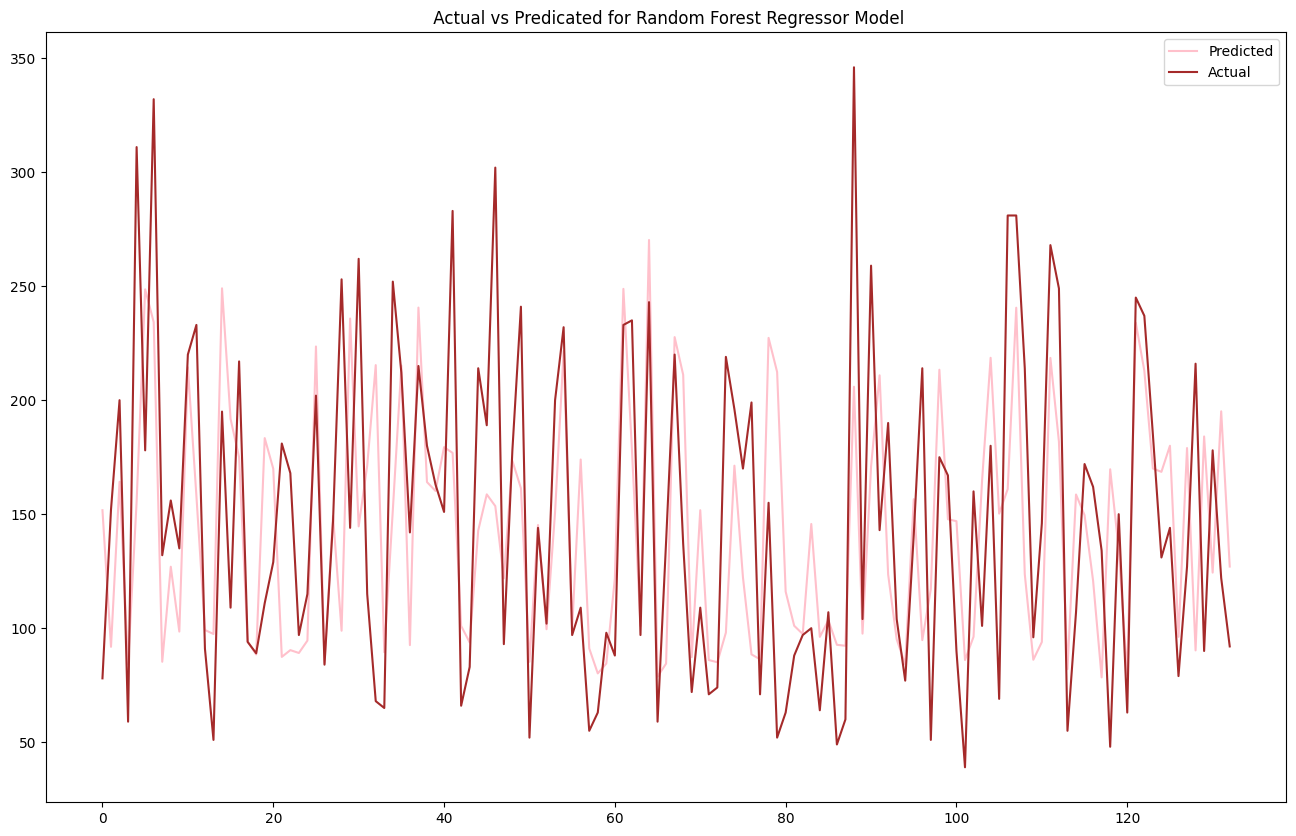

In [ ]:
# Plot Actual vs Predicted for Random Forest Regresssor
plt.figure(figsize=(16, 10))
plt.plot(range(len(y_pred)), rfr_pred, color= "pink", label = "Predicted")
plt.plot(range(len(y_test)),y_test, color = "brown", label = "Actual")
plt.legend(loc="upper right")
plt.title(" Actual vs Predicated for Random Forest Regressor Model")

## Conclusion
Ridge Regression had the lowest RMSE score out of the three models that were used. Although none of the models performed particularly well at forecasting values for this data, that would theoretically make the Ridge model the best model. An RMSE that is close to zero is ideal.

| OLS 1 |  OLS 2   |  OLS 3 | Ridge Regression | Random Forest Regressor
|-------|-----|-------|------------------|------------------------
| 53.48 | 55.17 | 55.53  |     53.13        |      61.52